

### Dataset Summary

The dataset contains 1,503 entries and 6 features. Here's the breakdown of the features:

1. **f (Frequency, Hz)**: Integer values representing the frequency of the airfoil's noise.
2. **alpha (Angle of attack, degrees)**: Float values for the angle of attack of the airfoil.
3. **c (Chord length, meters)**: Float values indicating the chord length of the airfoil.
4. **U_infinity (Free-stream velocity, m/s)**: Float values for the velocity of the air passing the airfoil.
5. **delta (Displacement thickness, meters)**: Float values representing the displacement thickness.
6. **SSPL (Sound Pressure Level, dB)**: Float values for the sound pressure level, which is the target variable for regression.


In [ ]:
!pip install pygam
import requests
import matplotlib.pyplot as plt
import seaborn as sns
# General libraries
import numpy as np
import pandas as pd
import os

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Machine Learning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from pygam import GAM, LinearGAM
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import QuantileRegressor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 32.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In [ ]:
  # shared link
shared_link = 'https://drive.google.com/file/d/1L0-cwuTGWHYUlI2GKKHXtVWjZS5GMXBK/view?usp=sharing'

# Extract the file ID from the shared link
file_id = shared_link.split('/')[-2]
download_link = f'https://drive.google.com/uc?export=download&id={file_id}'

# Download the data set
response = requests.get(download_link)

# Save the Data temporarily (you can delete it later)
with open('Airfoil Self-Noise.csv', 'wb') as f:
    f.write(response.content)
data=pd.read_csv('Airfoil Self-Noise.csv')
data.head(20)


,f,alpha,c,U_infinity,delta,SSPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
5,2500,0.0,0.3048,71.3,0.002663,125.571
6,3150,0.0,0.3048,71.3,0.002663,125.201
7,4000,0.0,0.3048,71.3,0.002663,123.061
8,5000,0.0,0.3048,71.3,0.002663,121.301
9,6300,0.0,0.3048,71.3,0.002663,119.541


In [ ]:
data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   f           1503 non-null   int64  
 1   alpha       1503 non-null   float64
 2   c           1503 non-null   float64
 3   U_infinity  1503 non-null   float64
 4   delta       1503 non-null   float64
 5   SSPL        1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


(None,
                   f        alpha            c   U_infinity        delta  \
 count   1503.000000  1503.000000  1503.000000  1503.000000  1503.000000   
 mean    2886.380572     6.782302     0.136548    50.860745     0.011140   
 std     3152.573137     5.918128     0.093541    15.572784     0.013150   
 min      200.000000     0.000000     0.025400    31.700000     0.000401   
 25%      800.000000     2.000000     0.050800    39.600000     0.002535   
 50%     1600.000000     5.400000     0.101600    39.600000     0.004957   
 75%     4000.000000     9.900000     0.228600    71.300000     0.015576   
 max    20000.000000    22.200000     0.304800    71.300000     0.058411   
 
               SSPL  
 count  1503.000000  
 mean    124.835943  
 std       6.898657  
 min     103.380000  
 25%     120.191000  
 50%     125.721000  
 75%     129.995500  
 max     140.987000  )

In [ ]:

# Check for missing values
missing_values = data.isnull().sum()
missing_values


,0
f,0
alpha,0
c,0
U_infinity,0
delta,0
SSPL,0


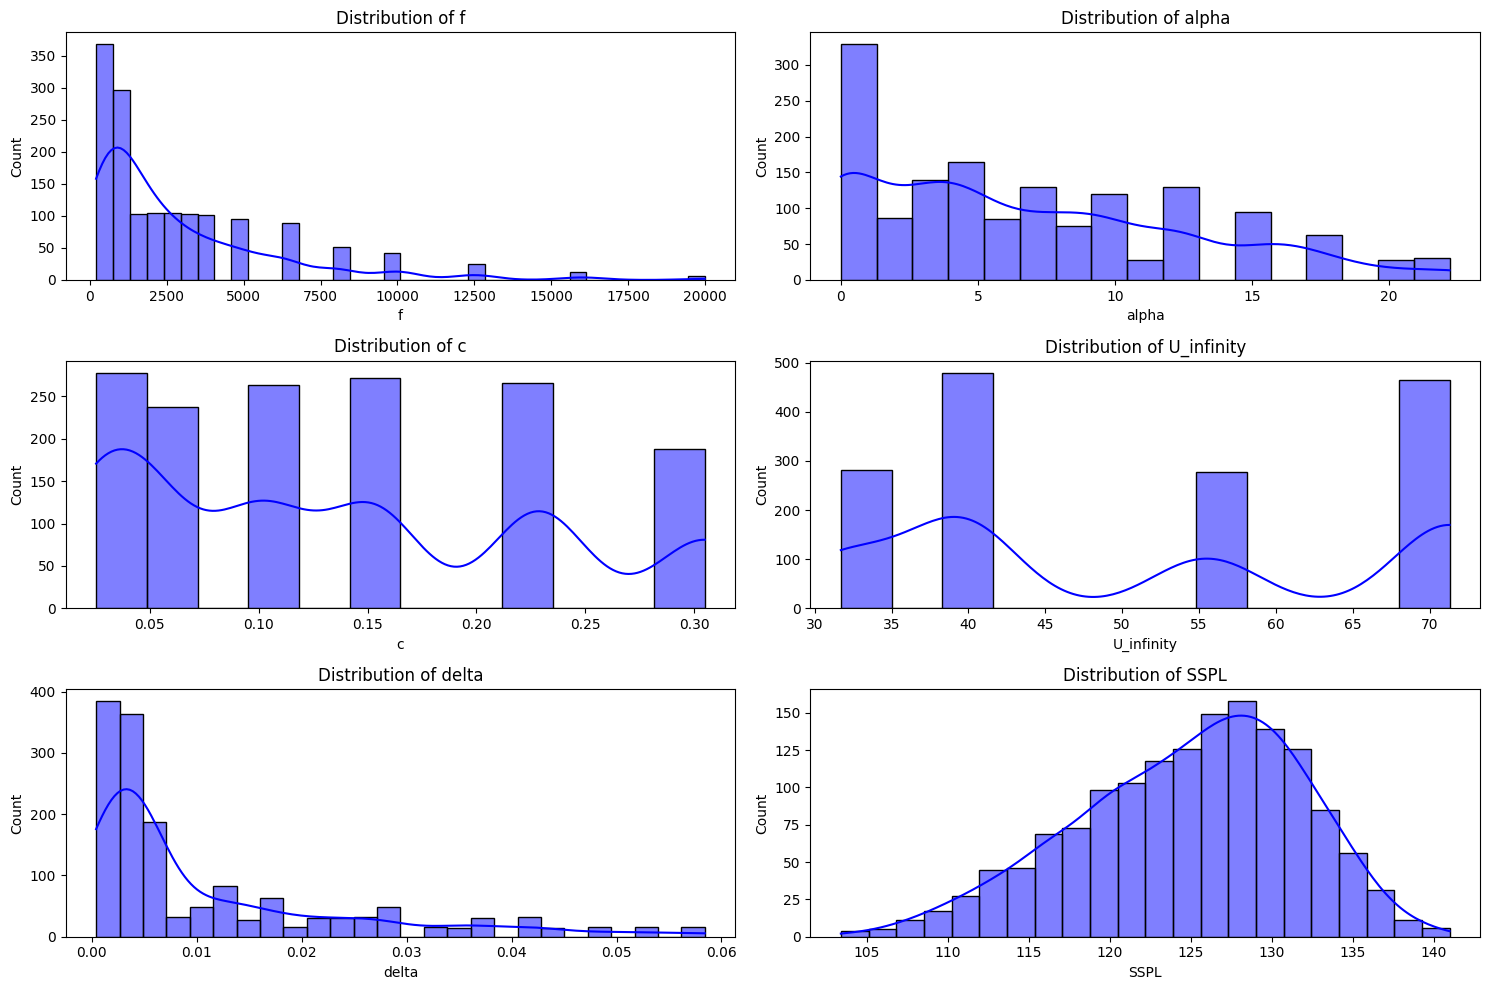

In [ ]:
# Plot distributions for each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[column], kde=True, color="blue")
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()


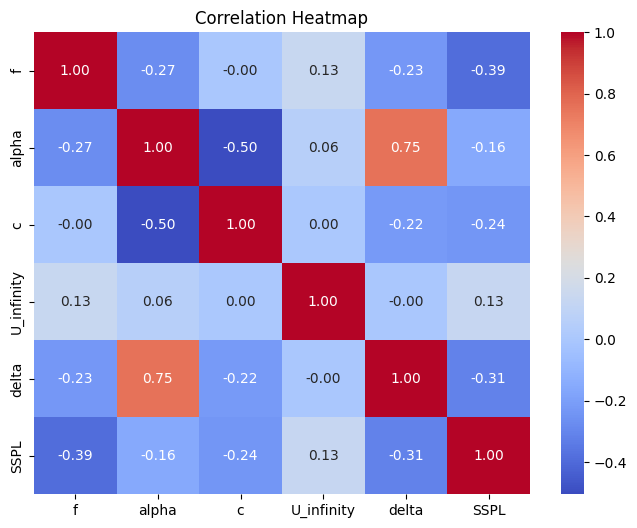

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Separate features and target variable
X = data.drop('SSPL', axis=1)  # Features are all columns except 'SSPL'
y = data['SSPL']  # Target variable is 'SSPL'



In [ ]:
regression_algorithms = {
    "Multiple_Linear_Regression": {
        "model": LinearRegression(fit_intercept=True, n_jobs=None)
    },

    "Polynomial_Regression": {
        "model": PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
    },

    "Ridge_Regression": {
        "model": Ridge(alpha=1.0, fit_intercept=True, max_iter=None,
                      tol=1e-3, solver='auto')
    },

    "Lasso_Regression": {
        "model": Lasso(alpha=0.01, fit_intercept=True, max_iter=1000,
                      tol=1e-4, warm_start=False, selection='cyclic')
    },

    "Elastic_Net_Regression": {
        "model": ElasticNet(alpha=0.01, l1_ratio=0.5, fit_intercept=True,
                           max_iter=1000, tol=1e-4, warm_start=False, selection='cyclic')
    },

    "Decision_Tree_Regression": {
        "model": DecisionTreeRegressor(criterion="squared_error", splitter="best", max_depth=None,
                                     min_samples_split=2, min_samples_leaf=1,
                                     max_features=None, random_state=42)
    },

    "Random_Forest_Regression": {
        "model": RandomForestRegressor(n_estimators=100, criterion="squared_error", max_depth=None,
                                     min_samples_split=2, min_samples_leaf=1, bootstrap=True,
                                     n_jobs=-1, random_state=42)
    },

    "ADA_Boost_Regression": {
        "model": AdaBoostRegressor(n_estimators=50, learning_rate=0.1,
                                 loss="linear", random_state=42)
    },

    "Gradient_Boosting_Regression": {
        "model": GradientBoostingRegressor(loss="squared_error", learning_rate=0.1, n_estimators=100,
                                         subsample=0.8, criterion="friedman_mse",
                                         min_samples_split=2, min_samples_leaf=1,
                                         max_depth=5, random_state=42)
    },

    "XGBoost_Regression": {
        "model": xgb.XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=100,
                                 objective="reg:squarederror", booster="gbtree", gamma=0,
                                 min_child_weight=1, subsample=1, colsample_bytree=1,
                                 reg_alpha=0, reg_lambda=1)
    },

    "K_Nearest_Neighbors_Regression": {
        "model": KNeighborsRegressor(n_neighbors=5, weights="uniform", algorithm="auto",
                                   leaf_size=30, p=2, metric="minkowski", n_jobs=-1)
    },

    "Support_Vector_Regression": {
        "model": SVR(kernel="rbf", degree=3, C=1.0, epsilon=0.1, gamma="scale",
                    tol=1e-3, max_iter=-1)
    },

    "Bayesian_Ridge_Regression": {
        "model": BayesianRidge(max_iter=300, tol=1e-3, alpha_1=1e-6, alpha_2=1e-6,
                              lambda_1=1e-6, lambda_2=1e-6, fit_intercept=True)
    },

    "Neural_Network_Regression": {
        "model": MLPRegressor(hidden_layer_sizes=(100,), activation="relu", solver="adam",
                            alpha=0.0001, batch_size="auto", learning_rate="constant",
                            learning_rate_init=0.001, max_iter=500, random_state=42)
    },

    "Generalized_Additive_Models": {
        "model": LinearGAM(n_splines=10, lam=0.6, max_iter=100, tol=1e-4)
    },

    "Quantile_Regression": {
        "model": QuantileRegressor(quantile=0.5, alpha=0.0, solver="highs-ds",
                                 fit_intercept=True)
    }
}

In [ ]:
import time

def train_all_models(X, y):

    # Normalize the features and target
    scaler_X = StandardScaler()
    X_scaled = scaler_X.fit_transform(X)
    scaler_y = StandardScaler()
    y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))



    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_scaled, test_size=0.2, random_state=42
    )
    print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

    # Dictionary to store results
    results = {}

    # Special handling for Polynomial Regression
    poly = regression_algorithms["Polynomial_Regression"]["model"]
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Loop through all algorithms
    for name, algo_dict in regression_algorithms.items():
        try:
            print(f"\nTraining {name}...")
            start_time = time.time()

            # Get the model
            model = algo_dict["model"]

            # Handle special cases
            if name == "Polynomial_Regression":
                model = LinearRegression()
                X_train_curr = X_train_poly
                X_test_curr = X_test_poly
            else:
                X_train_curr = X_train
                X_test_curr = X_test

            # Fit the model
            model.fit(X_train_curr, y_train.ravel())

            # Make predictions
            y_pred_train = model.predict(X_train_curr)
            y_pred_test = model.predict(X_test_curr)

            # Ensure predictions are 2D for metric calculations
            y_pred_train = y_pred_train.reshape(-1, 1)
            y_pred_test = y_pred_test.reshape(-1, 1)

            # Calculate metrics
            train_time = time.time() - start_time
            metrics = {
                'train_r2': r2_score(y_train, y_pred_train),
                'test_r2': r2_score(y_test, y_pred_test),
                'train_mse': mean_squared_error(y_train, y_pred_train),
                'test_mse': mean_squared_error(y_test, y_pred_test),
                'train_mae': mean_absolute_error(y_train, y_pred_train),
                'test_mae': mean_absolute_error(y_test, y_pred_test),
                'train_rmse': np.sqrt(mean_squared_error(y_train, y_pred_train)),
                'test_rmse': np.sqrt(mean_squared_error(y_test, y_pred_test)),
                'training_time': train_time
            }

            # Store results
            results[name] = {
                'model': model,
                'metrics': metrics,
                'scaler_X': scaler_X,
                'scaler_y': scaler_y
            }
             #For Polynomial Regression, also save the polynomial transformer
            if name == "Polynomial_Regression":
                 results[name]['poly'] = poly

            # Print metrics
            print(f"Training completed in {train_time:.2f} seconds")
            print(f"Test R² Score: {metrics['test_r2']:.4f}")
            print(f"Test RMSE: {metrics['test_rmse']:.4f}")
            print(f"Test MAE: {metrics['test_mae']:.4f}")

        except Exception as e:
            print(f"Error training {name}: {str(e)}")
            results[name] = {
                'model': None,
                'metrics': None,
                'error': str(e)
            }

    # Create summary DataFrame
    summary_data = [
        {
            'Algorithm': name,
            'Test R²': result['metrics']['test_r2'],
            'Test RMSE': result['metrics']['test_rmse'],
            'Test MAE': result['metrics']['test_mae'],
            'Training Time (s)': result['metrics']['training_time']
        }
        for name, result in results.items()
        if result['metrics'] is not None
    ]

    summary_df = pd.DataFrame(summary_data)
    summary_df = summary_df.sort_values('Test R²', ascending=False)

    return results, summary_df

# Train all models
results, summary = train_all_models(X, y)

# Print the summary
print("\nModel Performance Summary:")
print(summary)


Training set shape: (1202, 5), Test set shape: (301, 5)

Training Multiple_Linear_Regression...
Training completed in 0.00 seconds
Test R² Score: 0.5583
Test RMSE: 0.6821
Test MAE: 0.5325

Training Polynomial_Regression...
Training completed in 0.02 seconds
Test R² Score: 0.6841
Test RMSE: 0.5769
Test MAE: 0.4419

Training Ridge_Regression...
Training completed in 0.01 seconds
Test R² Score: 0.5581
Test RMSE: 0.6822
Test MAE: 0.5327

Training Lasso_Regression...
Training completed in 0.01 seconds
Test R² Score: 0.5523
Test RMSE: 0.6868
Test MAE: 0.5387

Training Elastic_Net_Regression...
Training completed in 0.00 seconds
Test R² Score: 0.5544
Test RMSE: 0.6852
Test MAE: 0.5368

Training Decision_Tree_Regression...
Training completed in 0.01 seconds
Test R² Score: 0.8813
Test RMSE: 0.3536
Test MAE: 0.2579

Training Random_Forest_Regression...
Training completed in 0.78 seconds
Test R² Score: 0.9342
Test RMSE: 0.2632
Test MAE: 0.1900

Training ADA_Boost_Regression...
Training completed 

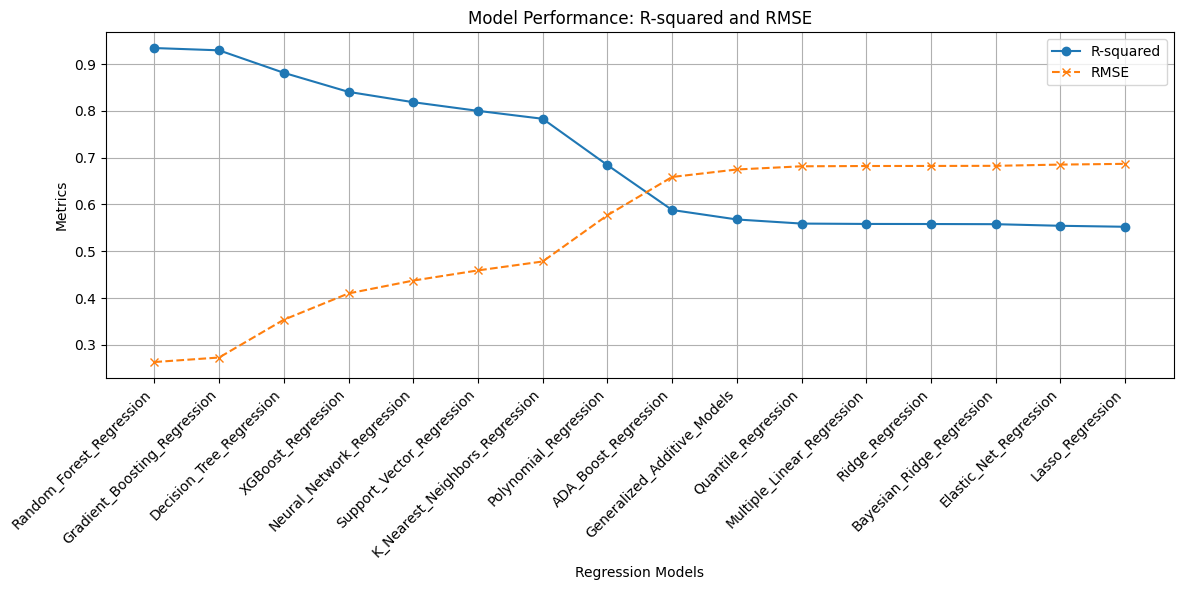

In [ ]:

import matplotlib.pyplot as plt

# Assuming 'summary' DataFrame from the previous code
# Extract R-squared and RMSE values
r2_scores = summary['Test R²']
rmse_values = summary['Test RMSE']
model_names = summary['Algorithm']

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(model_names, r2_scores, marker='o', linestyle='-', label='R-squared')
plt.plot(model_names, rmse_values, marker='x', linestyle='--', label='RMSE')

# Customize the plot
plt.xlabel("Regression Models")
plt.ylabel("Metrics")
plt.title("Model Performance: R-squared and RMSE")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.grid(True)
plt.show()

In [ ]:
# Create a directory to store the models if it doesn't exist
models_dir = "saved_models"
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

# Save each model
for name, result in results.items():
    if result['model'] is not None:
        model_filename = os.path.join(models_dir, f"{name}_model.pkl")
        import joblib
        joblib.dump(result, model_filename)  # Save the entire result dictionary
        print(f"Saved {name} model to {model_filename}")

Saved Multiple_Linear_Regression model to saved_models/Multiple_Linear_Regression_model.pkl
Saved Polynomial_Regression model to saved_models/Polynomial_Regression_model.pkl
Saved Ridge_Regression model to saved_models/Ridge_Regression_model.pkl
Saved Lasso_Regression model to saved_models/Lasso_Regression_model.pkl
Saved Elastic_Net_Regression model to saved_models/Elastic_Net_Regression_model.pkl
Saved Decision_Tree_Regression model to saved_models/Decision_Tree_Regression_model.pkl
Saved Random_Forest_Regression model to saved_models/Random_Forest_Regression_model.pkl
Saved ADA_Boost_Regression model to saved_models/ADA_Boost_Regression_model.pkl
Saved Gradient_Boosting_Regression model to saved_models/Gradient_Boosting_Regression_model.pkl
Saved XGBoost_Regression model to saved_models/XGBoost_Regression_model.pkl
Saved K_Nearest_Neighbors_Regression model to saved_models/K_Nearest_Neighbors_Regression_model.pkl
Saved Support_Vector_Regression model to saved_models/Support_Vector_R

In [ ]:
# Create a directory to store the scalers if it doesn't exist
scalers_dir = "saved_scalers"
if not os.path.exists(scalers_dir):
    os.makedirs(scalers_dir)

# Save each scaler
for name, result in results.items():
    if result['model'] is not None:
        scaler_X_filename = os.path.join(scalers_dir, f"{name}_scaler_X.pkl")
        scaler_y_filename = os.path.join(scalers_dir, f"{name}_scaler_y.pkl")

        joblib.dump(result['scaler_X'], scaler_X_filename)
        joblib.dump(result['scaler_y'], scaler_y_filename)

        print(f"Saved {name} scalers to {scaler_X_filename} and {scaler_y_filename}")

Saved Multiple_Linear_Regression scalers to saved_scalers/Multiple_Linear_Regression_scaler_X.pkl and saved_scalers/Multiple_Linear_Regression_scaler_y.pkl
Saved Polynomial_Regression scalers to saved_scalers/Polynomial_Regression_scaler_X.pkl and saved_scalers/Polynomial_Regression_scaler_y.pkl
Saved Ridge_Regression scalers to saved_scalers/Ridge_Regression_scaler_X.pkl and saved_scalers/Ridge_Regression_scaler_y.pkl
Saved Lasso_Regression scalers to saved_scalers/Lasso_Regression_scaler_X.pkl and saved_scalers/Lasso_Regression_scaler_y.pkl
Saved Elastic_Net_Regression scalers to saved_scalers/Elastic_Net_Regression_scaler_X.pkl and saved_scalers/Elastic_Net_Regression_scaler_y.pkl
Saved Decision_Tree_Regression scalers to saved_scalers/Decision_Tree_Regression_scaler_X.pkl and saved_scalers/Decision_Tree_Regression_scaler_y.pkl
Saved Random_Forest_Regression scalers to saved_scalers/Random_Forest_Regression_scaler_X.pkl and saved_scalers/Random_Forest_Regression_scaler_y.pkl
Saved A

In [ ]:



def predict_with_saved_models(new_record_data, models_dir="saved_models", scalers_dir="saved_scalers"):

    predictions = {}

    for filename in os.listdir(models_dir):
        if filename.endswith("_model.pkl"):
            model_name = filename[:-10]  # Remove "_model.pkl"
            model_filepath = os.path.join(models_dir, filename)

            # Load the model and scalers
            loaded_data = joblib.load(model_filepath)
            model = loaded_data['model']
            scaler_X = loaded_data['scaler_X']
            scaler_y = loaded_data['scaler_y']

            # Preprocess the new record data
            new_record_scaled = scaler_X.transform(new_record_data)

            # Handle Polynomial Regression
            if model_name == "Polynomial_Regression":
                poly = loaded_data['poly'] # Access the saved PolynomialFeatures object
                new_record_scaled = poly.transform(new_record_scaled)

            # Make predictions
            scaled_predictions = model.predict(new_record_scaled)

            # Inverse transform the predictions
            predictions[model_name] = scaler_y.inverse_transform(scaled_predictions.reshape(-1, 1))

    return predictions

# Example usage (replace with your actual new data):
new_data = pd.DataFrame({
    'f': [200],
    'alpha': [5.0],
    'c': [0.2],
    'U_infinity': [10],
    'delta': [0.01],
})


# Make predictions using the function
all_model_predictions = predict_with_saved_models(new_data)

# Print the predictions for each model
for model_name, prediction in all_model_predictions.items():
    print(f"Predictions from {model_name} model: {prediction}")

Predictions from Ridge_Regression model: [[122.94462493]]
Predictions from XGBoost_Regression model: [[128.17229]]
Predictions from Support_Vector_Regression model: [[124.28154952]]
Predictions from Multiple_Linear_Regression model: [[122.94067803]]
Predictions from Bayesian_Ridge_Regression model: [[122.95286195]]
Predictions from Gradient_Boosting_Regression model: [[127.17740631]]
Predictions from Elastic_Net_Regression model: [[123.06441015]]
Predictions from Generalized_Additive_Models model: [[126.02844739]]
Predictions from Polynomial_Regression model: [[123.75039756]]
Predictions from Neural_Network_Regression model: [[124.79901273]]
Predictions from Quantile_Regression model: [[123.15802967]]
Predictions from ADA_Boost_Regression model: [[126.28864]]
Predictions from Decision_Tree_Regression model: [[127.011]]
Predictions from K_Nearest_Neighbors_Regression model: [[125.847]]
Predictions from Lasso_Regression model: [[123.1431636]]
Predictions from Random_Forest_Regression mod